In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'


extract_path = '/content/dataset'

print("Dosyalar çıkartılıyor... (Bu işlem 1-2 dk sürebilir)")

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Başarılı! Dosyalar çıkartıldı.")
else:
    print("❌ HATA: Zip dosyası bulunamadı! Lütfen dosya adının 'archive.zip' olduğundan emin ol.")

Dosyalar çıkartılıyor... (Bu işlem 1-2 dk sürebilir)
✅ Başarılı! Dosyalar çıkartıldı.


In [4]:
########################################
# Yaren Bal
# - Base Model 1: MobileNetV2
# - Advanced Model : DenseNet169


import os
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import DenseNet121_Weights, MobileNet_V2_Weights
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ------------ CİHAZ SEÇİMİ ------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Kullanılan cihaz:", device)

# ------------ DATA PATH (Kaggle 2D) ------------
train_dir = "/content/dataset/alziemer_dataset/train"
val_dir   = "/content/dataset/alziemer_dataset/val"
test_dir  = "/content/dataset/alziemer_dataset/test"


# ------------ TRANSFORM (2D) ------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

# ------------ BOZUK GÖRSELLERİ ATLAMA ------------
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.verify()
        return True
    except Exception:
        print("⚠️ Bozuk/okunamayan görsel atlandı:", path)
        return False

# ------------ DATASET & DATALOADER ------------
train_dataset = datasets.ImageFolder(train_dir, transform=transform, is_valid_file=is_valid_image)
val_dataset   = datasets.ImageFolder(val_dir,   transform=transform, is_valid_file=is_valid_image)
test_dataset  = datasets.ImageFolder(test_dir,  transform=transform, is_valid_file=is_valid_image)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,  num_workers=0)
val_loader   = DataLoader(val_dataset,   batch_size=16, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset,  batch_size=16, shuffle=False, num_workers=0)

print("Train görüntü sayısı:", len(train_dataset))
print("Val   görüntü sayısı:", len(val_dataset))
print("Test  görüntü sayısı:", len(test_dataset))
print("Sınıflar:", train_dataset.classes)

num_classes = len(train_dataset.classes)




Kullanılan cihaz: cuda
⚠️ Bozuk/okunamayan görsel atlandı: /content/dataset/alziemer_dataset/train/Moderate Dementia/Moderate Dementia_original_64.jpg
Train görüntü sayısı: 11199
Val   görüntü sayısı: 2400
Test  görüntü sayısı: 2400
Sınıflar: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


Kullanılan Cihaz: cuda

[1/3] MobileNetV2 (Base Model) Hazırlanıyor...

>>> BAŞLATILIYOR: MobileNetV2_Base (Epochs: 15)
----------------------------------------
Epoch 1/15
  TRAIN Loss: 0.1938 Acc: 0.9288
  VAL Loss: 0.0279 Acc: 0.9925
Epoch 2/15
  TRAIN Loss: 0.0361 Acc: 0.9880
  VAL Loss: 0.0088 Acc: 0.9975
Epoch 3/15
  TRAIN Loss: 0.0201 Acc: 0.9932
  VAL Loss: 0.0283 Acc: 0.9913
Epoch 4/15
  TRAIN Loss: 0.0205 Acc: 0.9928
  VAL Loss: 0.0067 Acc: 0.9988
Epoch 5/15
  TRAIN Loss: 0.0169 Acc: 0.9946
  VAL Loss: 0.0012 Acc: 1.0000
Epoch 6/15
  TRAIN Loss: 0.0119 Acc: 0.9961
  VAL Loss: 0.0182 Acc: 0.9942
Epoch 7/15
  TRAIN Loss: 0.0098 Acc: 0.9971
  VAL Loss: 0.0441 Acc: 0.9867
Epoch 8/15
  TRAIN Loss: 0.0199 Acc: 0.9931
  VAL Loss: 0.0009 Acc: 0.9996
Epoch 9/15
  TRAIN Loss: 0.0083 Acc: 0.9973
  VAL Loss: 0.0023 Acc: 0.9996
Epoch 10/15
  TRAIN Loss: 0.0087 Acc: 0.9971
  VAL Loss: 0.0012 Acc: 0.9996
Epoch 11/15
  TRAIN Loss: 0.0094 Acc: 0.9971
  VAL Loss: 0.0014 Acc: 0.9996
Epoch 12/15


100%|██████████| 54.7M/54.7M [00:00<00:00, 212MB/s]



>>> BAŞLATILIYOR: DenseNet169_Advanced (Epochs: 10)
----------------------------------------
Epoch 1/10
  TRAIN Loss: 0.1605 Acc: 0.9440
  VAL Loss: 0.0152 Acc: 0.9979
Epoch 2/10
  TRAIN Loss: 0.0225 Acc: 0.9937
  VAL Loss: 0.0038 Acc: 0.9996
Epoch 3/10
  TRAIN Loss: 0.0211 Acc: 0.9935
  VAL Loss: 0.0006 Acc: 1.0000
Epoch 4/10
  TRAIN Loss: 0.0208 Acc: 0.9937
  VAL Loss: 0.0883 Acc: 0.9663
Epoch 5/10
  TRAIN Loss: 0.0130 Acc: 0.9962
  VAL Loss: 0.0807 Acc: 0.9675
Epoch 6/10
  TRAIN Loss: 0.0067 Acc: 0.9987
  VAL Loss: 0.0006 Acc: 1.0000
Epoch 7/10
  TRAIN Loss: 0.0018 Acc: 1.0000
  VAL Loss: 0.0003 Acc: 1.0000
Epoch 8/10
  TRAIN Loss: 0.0015 Acc: 0.9998
  VAL Loss: 0.0002 Acc: 1.0000
Epoch 9/10
  TRAIN Loss: 0.0010 Acc: 1.0000
  VAL Loss: 0.0002 Acc: 1.0000
Epoch 10/10
  TRAIN Loss: 0.0007 Acc: 1.0000
  VAL Loss: 0.0001 Acc: 1.0000

DenseNet169_Advanced tamamlandı: 28m 26s
Best Val Acc: 1.0000

[3/3] Grafikler Çiziliyor...


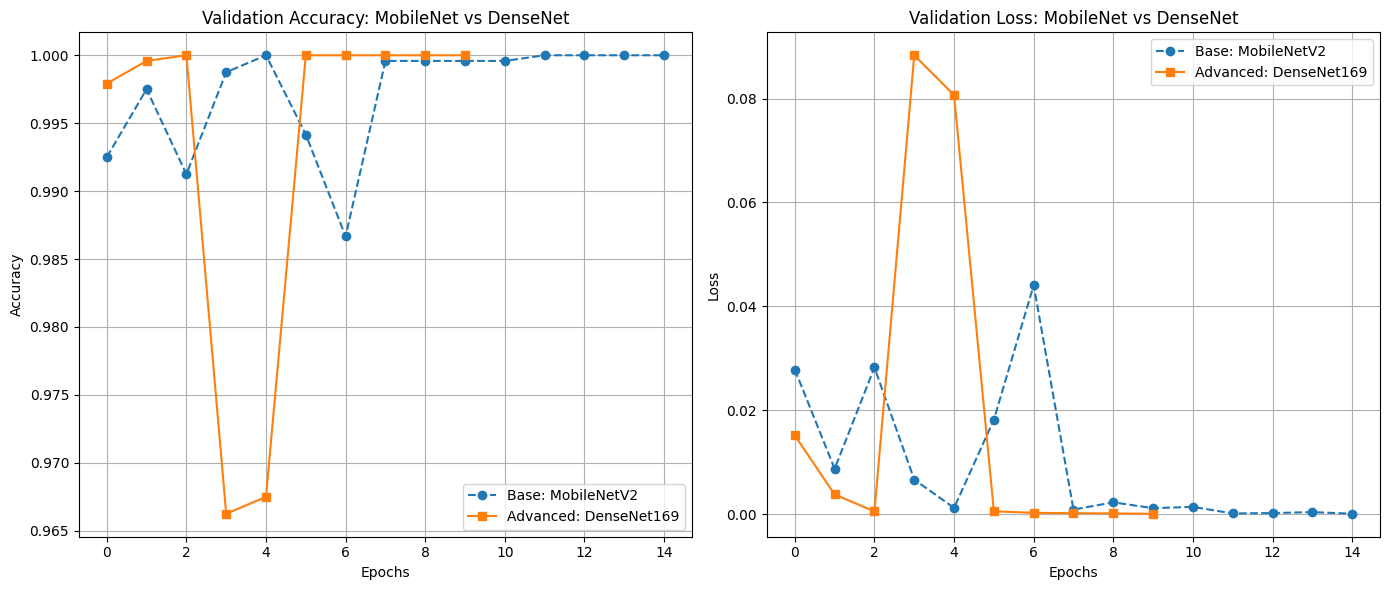


İŞLEM TAMAMLANDI! Sonuçlar kaydedildi.


In [5]:
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision.models import densenet169, DenseNet169_Weights

# 1. CİHAZ AYARI
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan Cihaz: {device}")

# ==========================================
# 2. EĞİTİM FONKSİYONU
# ==========================================
history_dict = {}

def train_model_full(model, model_name, criterion, optimizer, scheduler=None, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss_history, val_loss_history = [], []
    train_acc_history, val_acc_history = [], []

    print(f"\n>>> BAŞLATILIYOR: {model_name} (Epochs: {num_epochs})")
    print("-" * 40)

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train' and scheduler:
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'  {phase.upper()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), f"{model_name}_final_best.pth")

    time_elapsed = time.time() - since
    print(f'\n{model_name} tamamlandı: {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    history_dict[model_name] = {
        'train_loss': train_loss_history, 'val_loss': val_loss_history,
        'train_acc': train_acc_history, 'val_acc': val_acc_history
    }
    return model

criterion = nn.CrossEntropyLoss()

# ==========================================
# 3. BASE MODEL: MobileNetV2
# ==========================================
print("\n[1/3] MobileNetV2 (Base Model) Hazırlanıyor...")

# Pre-trained ağırlıklar
weights_mob = MobileNet_V2_Weights.IMAGENET1K_V1
mobilenet = mobilenet_v2(weights=weights_mob)

# MobileNetV2'nin classifier yapısı: classifier[1] son lineer katmandır
in_features_mob = mobilenet.classifier[1].in_features
mobilenet.classifier[1] = nn.Linear(in_features_mob, 4)

mobilenet = mobilenet.to(device)

# Optimizer
optimizer_mob = torch.optim.Adam(mobilenet.parameters(), lr=1e-4)

# Eğitimi Başlat (15 Epoch - Hızlı model)
mobilenet = train_model_full(
    mobilenet, "MobileNetV2_Base", criterion, optimizer_mob, num_epochs=15
)

# ==========================================
# 4. ADVANCED MODEL: DenseNet169
# ==========================================
print("\n[2/3] DenseNet169 (Advanced Model) Hazırlanıyor...")

# Daha derin bir DenseNet kullanıyoruz (121 yerine 169)
weights_dense = DenseNet169_Weights.IMAGENET1K_V1
densenet = densenet169(weights=weights_dense)

# Classifier katmanını güncelle
in_features_dense = densenet.classifier.in_features
densenet.classifier = nn.Linear(in_features_dense, 4)

densenet = densenet.to(device)

# Optimizer ve Scheduler
optimizer_dense = torch.optim.Adam(densenet.parameters(), lr=1e-4)

scheduler_dense = torch.optim.lr_scheduler.StepLR(optimizer_dense, step_size=5, gamma=0.1)

# Eğitimi Başlat (10 Epoch - Ağır model)
densenet = train_model_full(
    densenet, "DenseNet169_Advanced", criterion, optimizer_dense,
    scheduler=scheduler_dense, num_epochs=10
)

# ==========================================
# 5. KARŞILAŞTIRMA GRAFİKLERİ
# ==========================================
print("\n[3/3] Grafikler Çiziliyor...")
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dict['MobileNetV2_Base']['val_acc'], label='Base: MobileNetV2', marker='o', linestyle='--')
plt.plot(history_dict['DenseNet169_Advanced']['val_acc'], label='Advanced: DenseNet169', marker='s')
plt.title('Validation Accuracy: MobileNet vs DenseNet')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['MobileNetV2_Base']['val_loss'], label='Base: MobileNetV2', marker='o', linestyle='--')
plt.plot(history_dict['DenseNet169_Advanced']['val_loss'], label='Advanced: DenseNet169', marker='s')
plt.title('Validation Loss: MobileNet vs DenseNet')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.savefig("Member3_Yaren_Comparison.png")
plt.show()

print("\nİŞLEM TAMAMLANDI! Sonuçlar kaydedildi.")